# Text Extraction
Extracting the text from the resumes and making a data frame with all the relevant content.

## Import the libraries

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

-----------------

There are resumes from four different categories. So, a data frame is created for each category separately and finally joined together as a single data frame.

One columns contains the entire data in the resume and the other column is about the category to which that resume belongs to.

So, a function can be created to extract the resume text from all the resumes in a particular folder and store that data in a list, that can be used to make a data frame later.

### Function to extract text from all the resumes in a folder

In [2]:
def resume_text(path, name):
    resume_data = []
    category = []
    directory = f'Resumes/{path}/'
    for resume in os.listdir(directory):
        if resume.endswith('.docx'):
            os.path.join(directory, resume)
            resume_data.append((textract.process(os.path.join(directory, resume))).decode('utf-8'))
            category.append(f'{name} Developer')

    return resume_data, category

### For People Soft category

In [3]:
resume_data_ps, category_ps = resume_text('Peoplesoft', 'PeopleSoft')

In [4]:
data_ps = pd.DataFrame(data = resume_data_ps , columns = ['Resume_Info'])
data_ps['Category_ps'] = category_ps
data_ps

,Resume_Info,Category_ps
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Developer
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft Developer
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft Developer
3,Classification: Internal\n\nClassification: In...,PeopleSoft Developer
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft Developer
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft Developer
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,PeopleSoft Developer
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Developer
8,Vinod Akkala ...,PeopleSoft Developer
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,PeopleSoft Developer


### For SQL category

In [5]:
resume_data_sql, category_sql = resume_text('SQL Developer', 'SQL')

In [6]:
data_sql = pd.DataFrame(data = resume_data_sql, columns = ['Resume_Info'])
data_sql['Category_sql'] = category_sql
data_sql

,Resume_Info,Category_sql
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


### For ReactJS category

In [7]:
resume_data_rjs, category_rjs = resume_text('ReactJS', 'React JS')

In [8]:
data_rjs = pd.DataFrame(data = resume_data_rjs , columns = ['Resume_Info'])
data_rjs['Category_rjs'] = category_rjs
data_rjs

,Resume_Info,Category_rjs
0,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
2,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
4,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer
5,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
6,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
7,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
8,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer


In [9]:
resume_data_wd, category_wd = resume_text('Workday', 'Work_Day')

In [10]:
data_wd = pd.DataFrame(data = resume_data_wd , columns = ['Resume_Info'])
data_wd['Category_wd'] = category_wd
data_wd

,Resume_Info,Category_wd
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Work_Day Developer
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Work_Day Developer
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Work_Day Developer
3,Harikrishna Akula ...,Work_Day Developer
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,Work_Day Developer
5,G Himaja\n\n ...,Work_Day Developer
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,Work_Day Developer
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Work_Day Developer
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,Work_Day Developer
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Work_Day Developer


### Combining into a single data frame

In [11]:
resume_data = data_ps.append([data_sql, data_rjs, data_wd], ignore_index = True)
resume_data

,Resume_Info,Category_ps,Category_sql,Category_rjs,Category_wd
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Developer,NaN,NaN,NaN
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft Developer,NaN,NaN,NaN
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft Developer,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft Developer,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft Developer,NaN,NaN,NaN
...,...,...,...,...,...
73,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Work_Day Developer
74,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Work_Day Developer
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Work_Day Developer
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Work_Day Developer


In [12]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Resume_Info   78 non-null     object
 1   Category_ps   21 non-null     object
 2   Category_sql  14 non-null     object
 3   Category_rjs  22 non-null     object
 4   Category_wd   21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


### Merging the 4 categories into a single category column

In [13]:
resume_data['Category'] = category_ps + category_sql + category_rjs + category_wd
resume_data

,Resume_Info,Category_ps,Category_sql,Category_rjs,Category_wd,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
3,Classification: Internal\n\nClassification: In...,PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
...,...,...,...,...,...,...
73,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Work_Day Developer,Work_Day Developer
74,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Work_Day Developer,Work_Day Developer
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Work_Day Developer,Work_Day Developer
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Work_Day Developer,Work_Day Developer


### Final data frame

In [14]:
resume_data = resume_data[["Category", "Resume_Info"]]

In [15]:
resume_data

,Category,Resume_Info
0,PeopleSoft Developer,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft Developer,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft Developer,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft Developer,Classification: Internal\n\nClassification: In...
4,PeopleSoft Developer,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...
73,Work_Day Developer,Workday Integration Consultant\n\n\n\nName ...
74,Work_Day Developer,Srikanth (WORKDAY hCM Consultant)\t ...
75,Work_Day Developer,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
76,Work_Day Developer,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [16]:
resume_data.to_csv('Resume_data.csv', index=False)

In [17]:
resume_data[resume_data.Category == 'PeopleSoft Developer']

,Category,Resume_Info
0,PeopleSoft Developer,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft Developer,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft Developer,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft Developer,Classification: Internal\n\nClassification: In...
4,PeopleSoft Developer,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
5,PeopleSoft Developer,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
6,PeopleSoft Developer,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...
7,PeopleSoft Developer,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
8,PeopleSoft Developer,Vinod Akkala ...
9,PeopleSoft Developer,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...


In [18]:
resume_data.isnull().sum()

Category       0
Resume_Info    0
dtype: int64

### Count of characters and words in the text column

In [19]:
resume_data['Num_words'] = resume_data['Resume_Info'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Resume_Info','Num_words']].head()

,Resume_Info,Num_words
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,G. Ananda Rayudu \n\n\t\t https://www.li...,1441
2,PeopleSoft Database Administrator\n\n ...,1346
3,Classification: Internal\n\nClassification: In...,558
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667


In [20]:
resume_data['Num_chars'] = resume_data['Resume_Info'].str.len()
resume_data[['Resume_Info','Num_chars']].head()

,Resume_Info,Num_chars
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,G. Ananda Rayudu \n\n\t\t https://www.li...,8318
2,PeopleSoft Database Administrator\n\n ...,6900
3,Classification: Internal\n\nClassification: In...,4917
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",5196


In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stop_words'] = resume_data['Resume_Info'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Resume_Info','Stop_words']].head()

,Resume_Info,Stop_words
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,G. Ananda Rayudu \n\n\t\t https://www.li...,186
2,PeopleSoft Database Administrator\n\n ...,177
3,Classification: Internal\n\nClassification: In...,114
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",123


In [22]:
resume_data['Numbers'] = resume_data['Resume_Info'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Resume_Info','Numbers']].head()

,Resume_Info,Numbers
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,G. Ananda Rayudu \n\n\t\t https://www.li...,6
2,PeopleSoft Database Administrator\n\n ...,4
3,Classification: Internal\n\nClassification: In...,7
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",7


In [23]:
resume_data

,Category,Resume_Info,Num_words,Num_chars,Stop_words,Numbers
0,PeopleSoft Developer,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft Developer,G. Ananda Rayudu \n\n\t\t https://www.li...,1441,8318,186,6
2,PeopleSoft Developer,PeopleSoft Database Administrator\n\n ...,1346,6900,177,4
3,PeopleSoft Developer,Classification: Internal\n\nClassification: In...,558,4917,114,7
4,PeopleSoft Developer,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667,5196,123,7
...,...,...,...,...,...,...
73,Work_Day Developer,Workday Integration Consultant\n\n\n\nName ...,904,7030,197,3
74,Work_Day Developer,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9
75,Work_Day Developer,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076,8329,236,6
76,Work_Day Developer,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1031,6836,193,7


## Cleaning the text
The text in the Resume_Info column is filled with a lot of symbols and other unwanted characters. The text should be cleaned by removing these characters. And by doing so it will become suitable to be used in training a machine learning model.

In [24]:
def clean_text(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [25]:
resume_data['Resume_Details'] = resume_data['Resume_Info'].apply(lambda x: clean_text(x))

In [26]:
resume_data

,Category,Resume_Info,Num_words,Num_chars,Stop_words,Numbers,Resume_Details
0,PeopleSoft Developer,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4,anubhav kumar singh core competencies scriptin...
1,PeopleSoft Developer,G. Ananda Rayudu \n\n\t\t https://www.li...,1441,8318,186,6,ananda rayudu profile summary years experience...
2,PeopleSoft Developer,PeopleSoft Database Administrator\n\n ...,1346,6900,177,4,peoplesoft database administrator gangareddy p...
3,PeopleSoft Developer,Classification: Internal\n\nClassification: In...,558,4917,114,7,classification internal classification interna...
4,PeopleSoft Developer,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667,5196,123,7,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...,...,...,...,...
73,Work_Day Developer,Workday Integration Consultant\n\n\n\nName ...,904,7030,197,3,workday integration consultant name sri krishn...
74,Work_Day Developer,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9,srikanth workday hcm consultant seeking suitab...
75,Work_Day Developer,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076,8329,236,6,workday hcm fcm name kumar role workday consul...
76,Work_Day Developer,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1031,6836,193,7,venkateswarlu workday consultant professional ...


In [27]:
cleaned_data = resume_data[['Category','Resume_Details']]

In [28]:
cleaned_data

,Category,Resume_Details
0,PeopleSoft Developer,anubhav kumar singh core competencies scriptin...
1,PeopleSoft Developer,ananda rayudu profile summary years experience...
2,PeopleSoft Developer,peoplesoft database administrator gangareddy p...
3,PeopleSoft Developer,classification internal classification interna...
4,PeopleSoft Developer,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
73,Work_Day Developer,workday integration consultant name sri krishn...
74,Work_Day Developer,srikanth workday hcm consultant seeking suitab...
75,Work_Day Developer,workday hcm fcm name kumar role workday consul...
76,Work_Day Developer,venkateswarlu workday consultant professional ...


In [29]:
cleaned_data.to_csv('Cleaned_Resumes.csv', index = False)

### Frequently occuring words

In [30]:
stopWords = set(stopwords.words('english')+['``',"''"])
total_words =[]
sentences = cleaned_data['Resume_Details'].values
cleaned_sentences = ""
for sentence in sentences:
    cleaned_text = clean_text(sentence)
    cleaned_sentences += cleaned_text
    required_words = nltk.word_tokenize(cleaned_text)
    for word in required_words:
        if word not in stopWords and word not in string.punctuation:
            total_words.append(word)
    
word_freq_dist = nltk.FreqDist(total_words)
most_common_words = word_freq_dist.most_common(50)
print(most_common_words)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 390), ('server', 359), ('data', 331), ('project', 326), ('reports', 326), ('sql', 278), ('business', 273), ('web', 249), ('database', 243), ('process', 236), ('worked', 220), ('client', 197), ('knowledge', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('system', 187), ('hcm', 182), ('like', 180), ('integration', 180), ('support', 178), ('development', 168), ('team', 166), ('creating', 164), ('skills', 163), ('working', 162), ('people', 160), ('technical', 158), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('good', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('testing', 138), ('eib', 134), ('production', 133), ('security', 133), ('management', 132)]


### Recognizing named entities

In [31]:
nlp = spacy.load('en_core_web_lg')

block = cleaned_sentences[1300:5200]
doc_block = nlp(block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

### Parts of speech existing here

In [32]:
for token in doc_block[:30]:
    print(token, token.pos_) 

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


### Nouns and Verbs

In [33]:
block = cleaned_sentences
doc_block = nlp(block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

### Adding a word count

In [34]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words', 'Count']
wd_df[0:15]

,Words,Count
0,experience,544
1,application,417
2,using,379
3,workday,353
4,reports,326
5,data,306
6,project,289
7,business,260
8,server,243
9,web,236


### Graphical representation of word counts

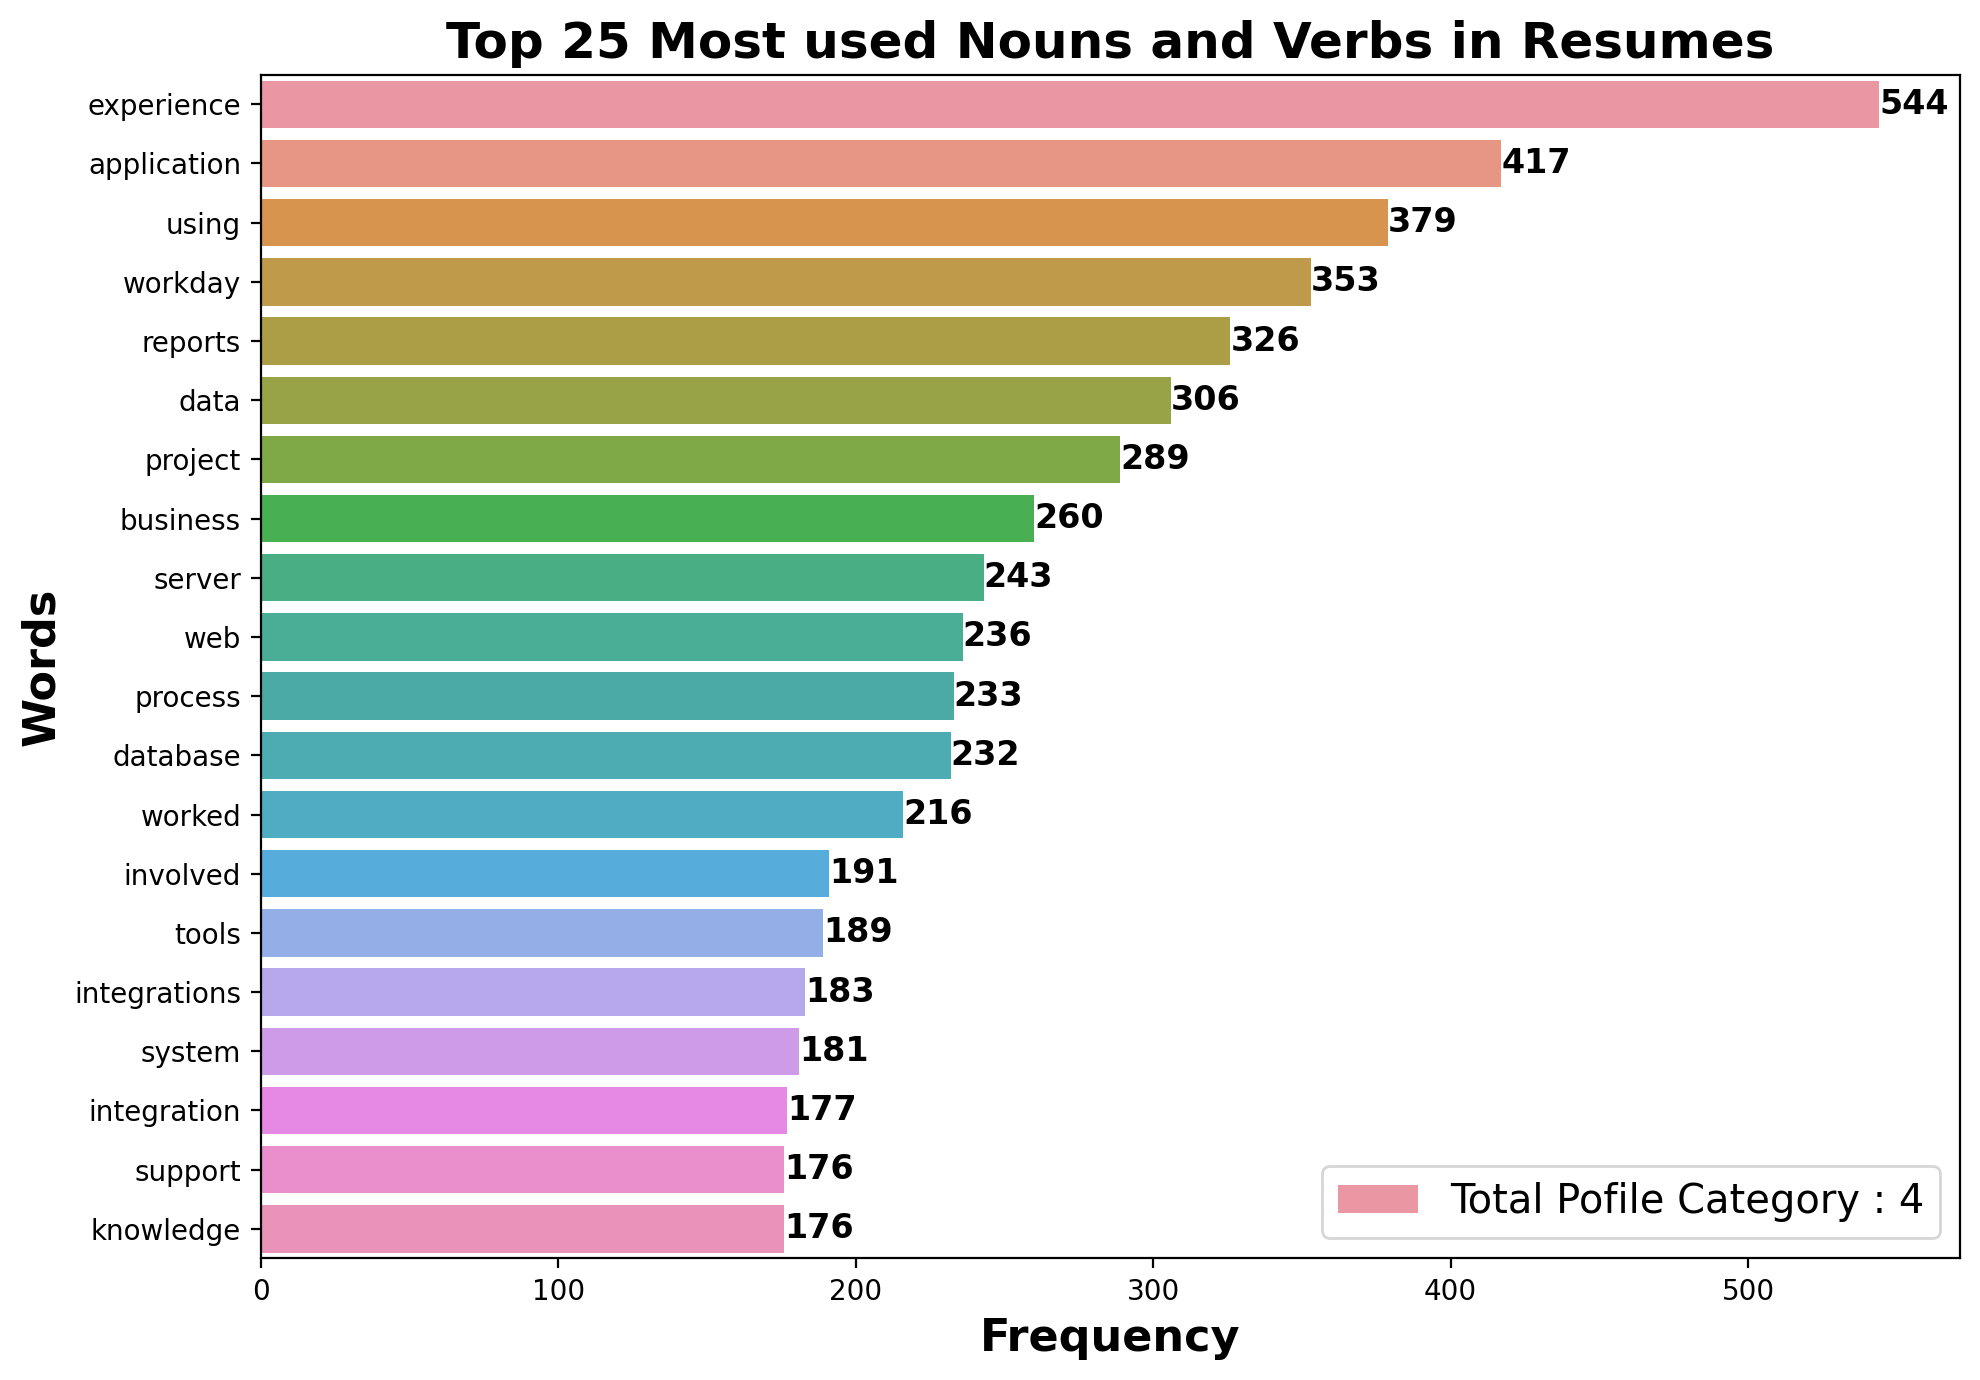

In [35]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Word cloud

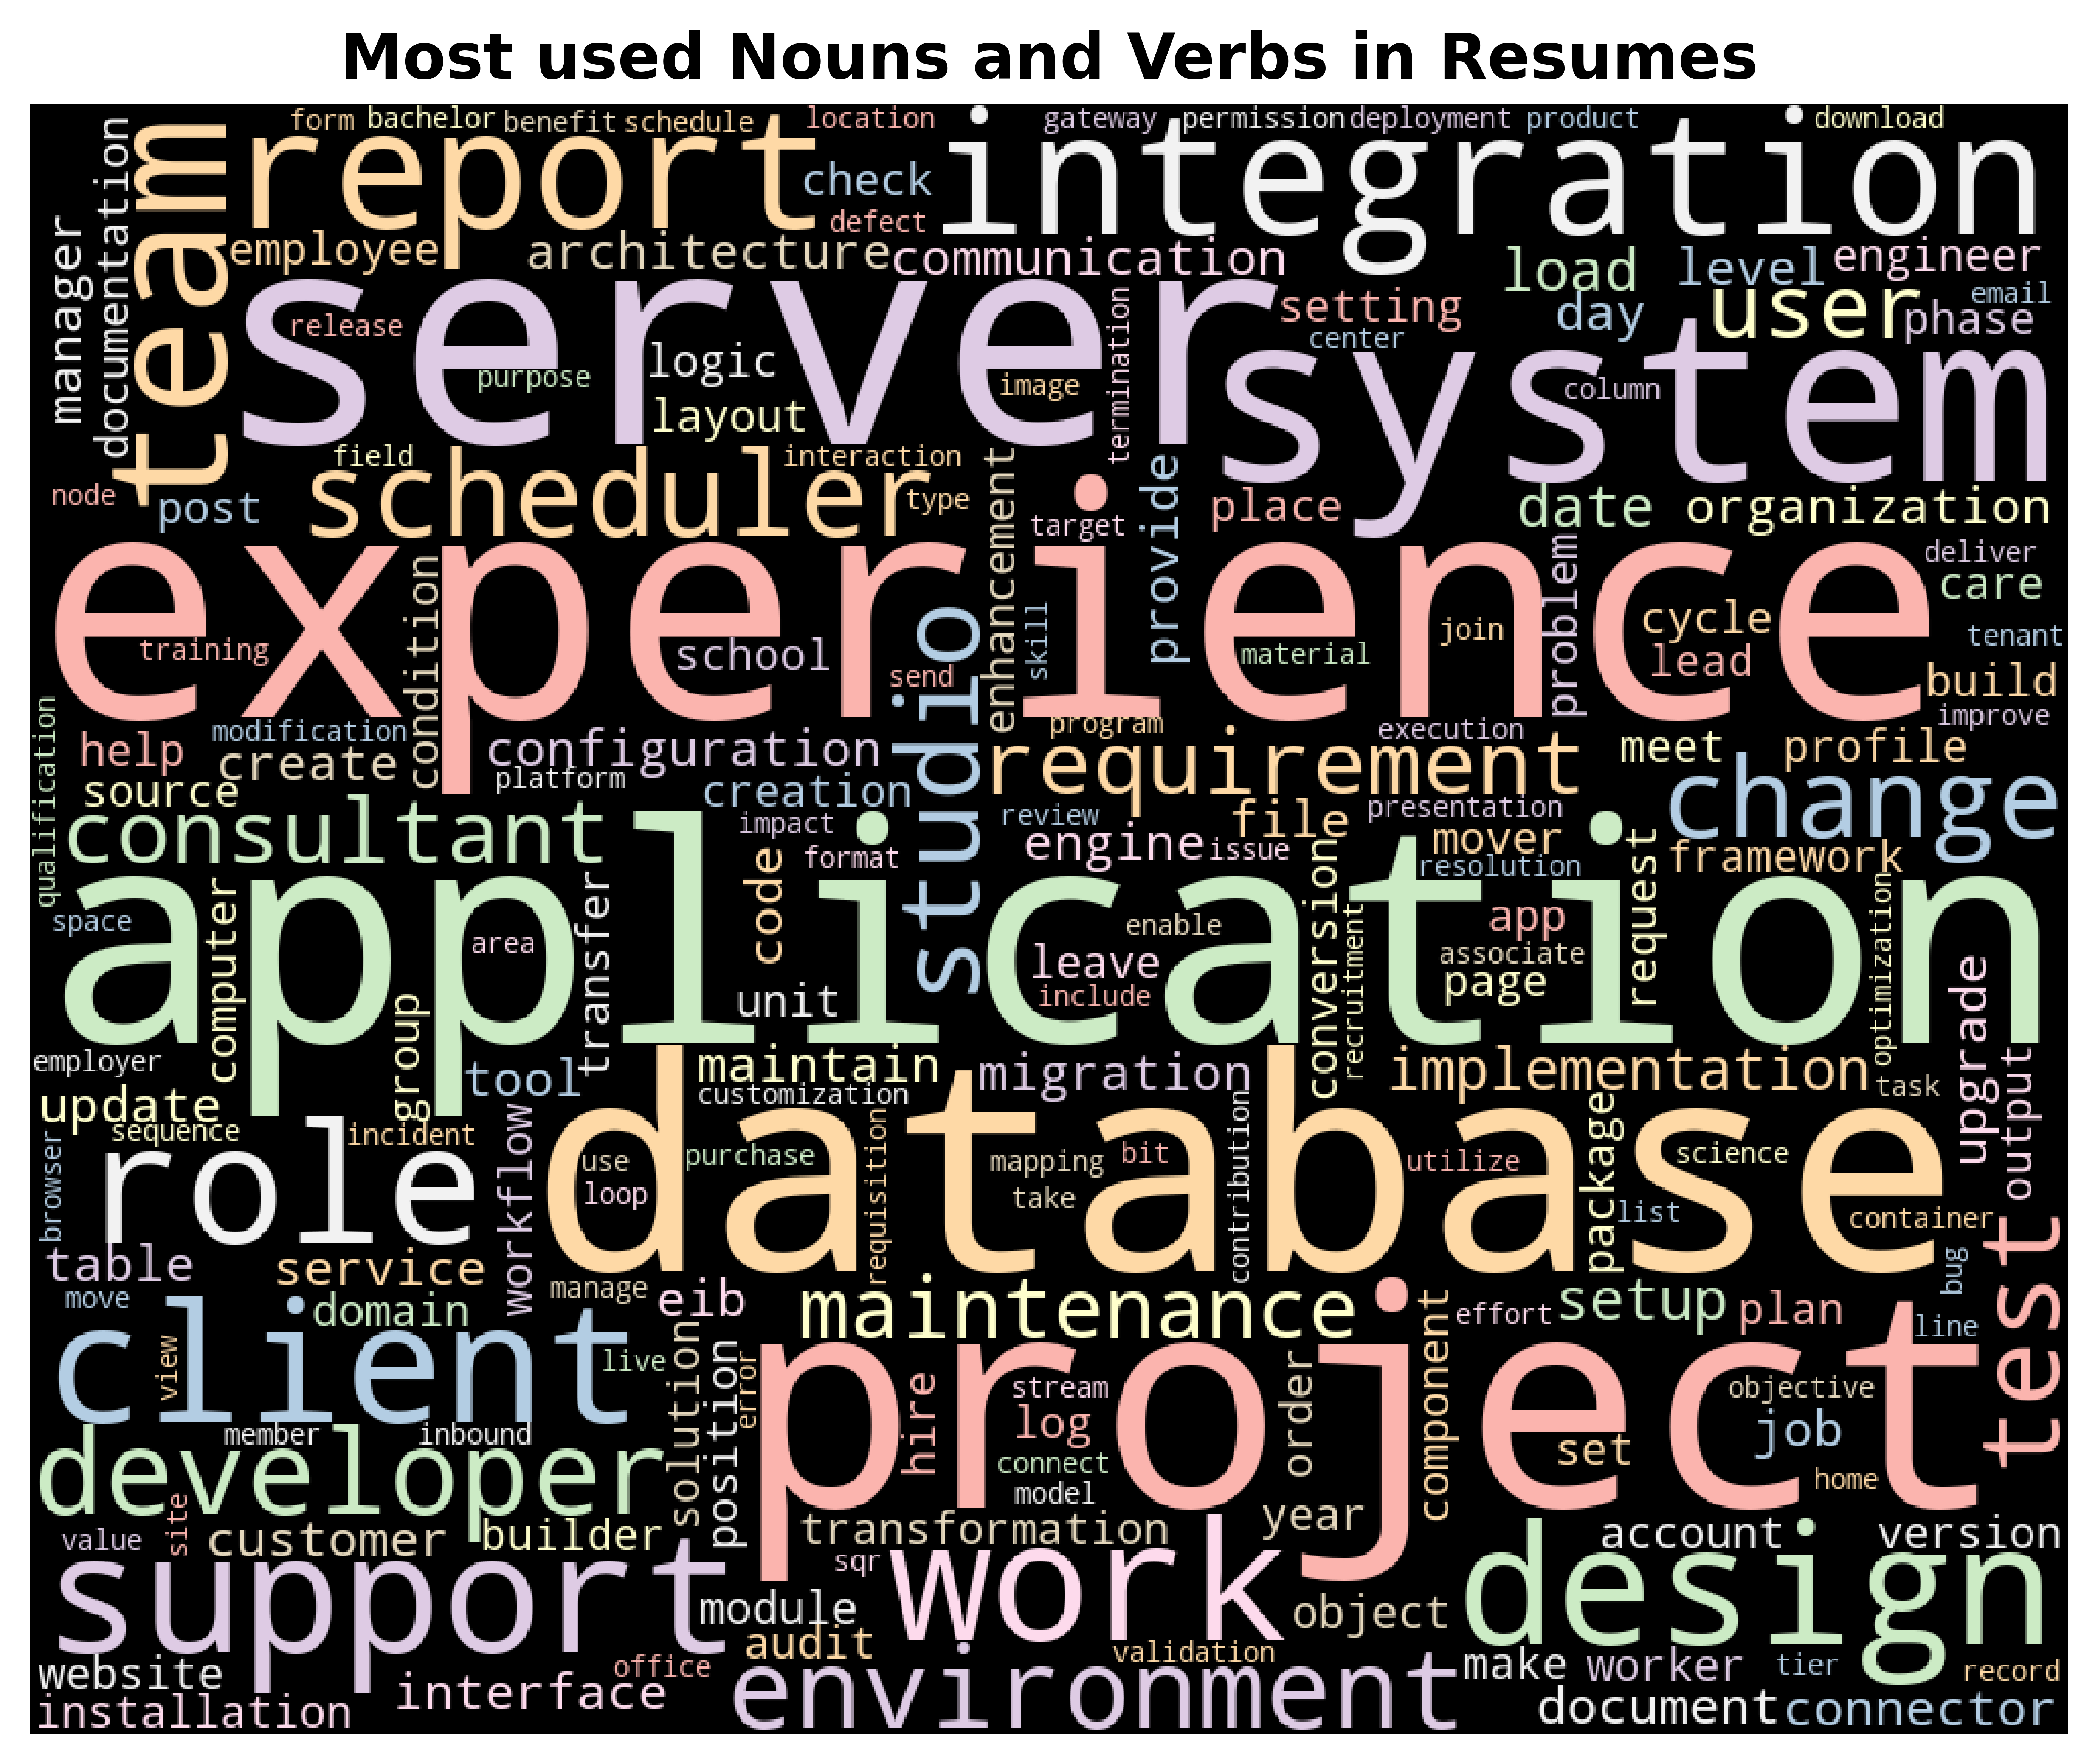

In [36]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

# EDA
Doing some data analysis to understand the distribution of resume counts among the four categories.

In [37]:
resume_data

,Category,Resume_Info,Num_words,Num_chars,Stop_words,Numbers,Resume_Details
0,PeopleSoft Developer,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4,anubhav kumar singh core competencies scriptin...
1,PeopleSoft Developer,G. Ananda Rayudu \n\n\t\t https://www.li...,1441,8318,186,6,ananda rayudu profile summary years experience...
2,PeopleSoft Developer,PeopleSoft Database Administrator\n\n ...,1346,6900,177,4,peoplesoft database administrator gangareddy p...
3,PeopleSoft Developer,Classification: Internal\n\nClassification: In...,558,4917,114,7,classification internal classification interna...
4,PeopleSoft Developer,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667,5196,123,7,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...,...,...,...,...
73,Work_Day Developer,Workday Integration Consultant\n\n\n\nName ...,904,7030,197,3,workday integration consultant name sri krishn...
74,Work_Day Developer,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9,srikanth workday hcm consultant seeking suitab...
75,Work_Day Developer,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076,8329,236,6,workday hcm fcm name kumar role workday consul...
76,Work_Day Developer,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1031,6836,193,7,venkateswarlu workday consultant professional ...


In [38]:
cleaned_data

,Category,Resume_Details
0,PeopleSoft Developer,anubhav kumar singh core competencies scriptin...
1,PeopleSoft Developer,ananda rayudu profile summary years experience...
2,PeopleSoft Developer,peoplesoft database administrator gangareddy p...
3,PeopleSoft Developer,classification internal classification interna...
4,PeopleSoft Developer,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
73,Work_Day Developer,workday integration consultant name sri krishn...
74,Work_Day Developer,srikanth workday hcm consultant seeking suitab...
75,Work_Day Developer,workday hcm fcm name kumar role workday consul...
76,Work_Day Developer,venkateswarlu workday consultant professional ...


In [40]:
cleaned_data['Category'].unique()

array(['PeopleSoft Developer', 'SQL Developer', 'React JS Developer',
       'Work_Day Developer'], dtype=object)

In [44]:
cleaned_data['Category'].value_counts()

React JS Developer      22
PeopleSoft Developer    21
Work_Day Developer      21
SQL Developer           14
Name: Category, dtype: int64

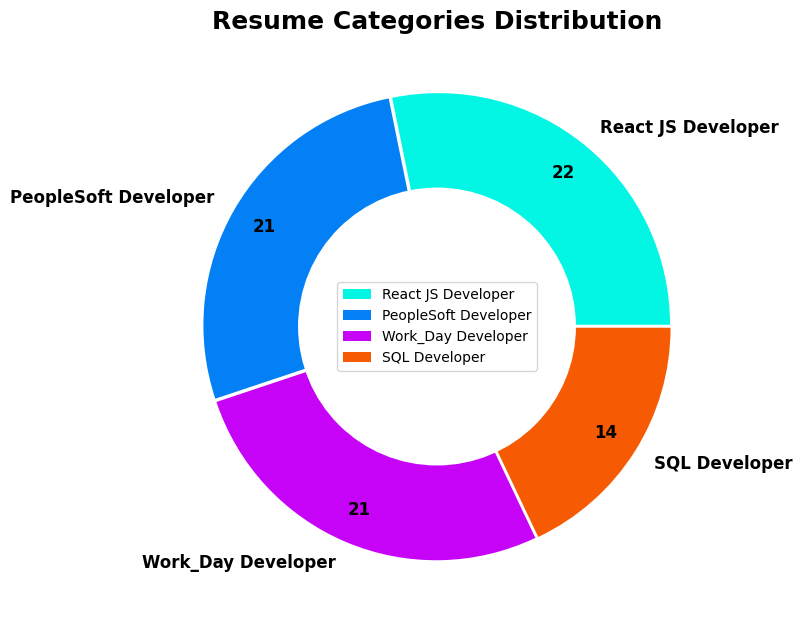

In [48]:
fig = plt.figure(figsize=(8,8))

sizes = cleaned_data['Category'].value_counts()
labels = cleaned_data['Category'].value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Resume Categories Distribution', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

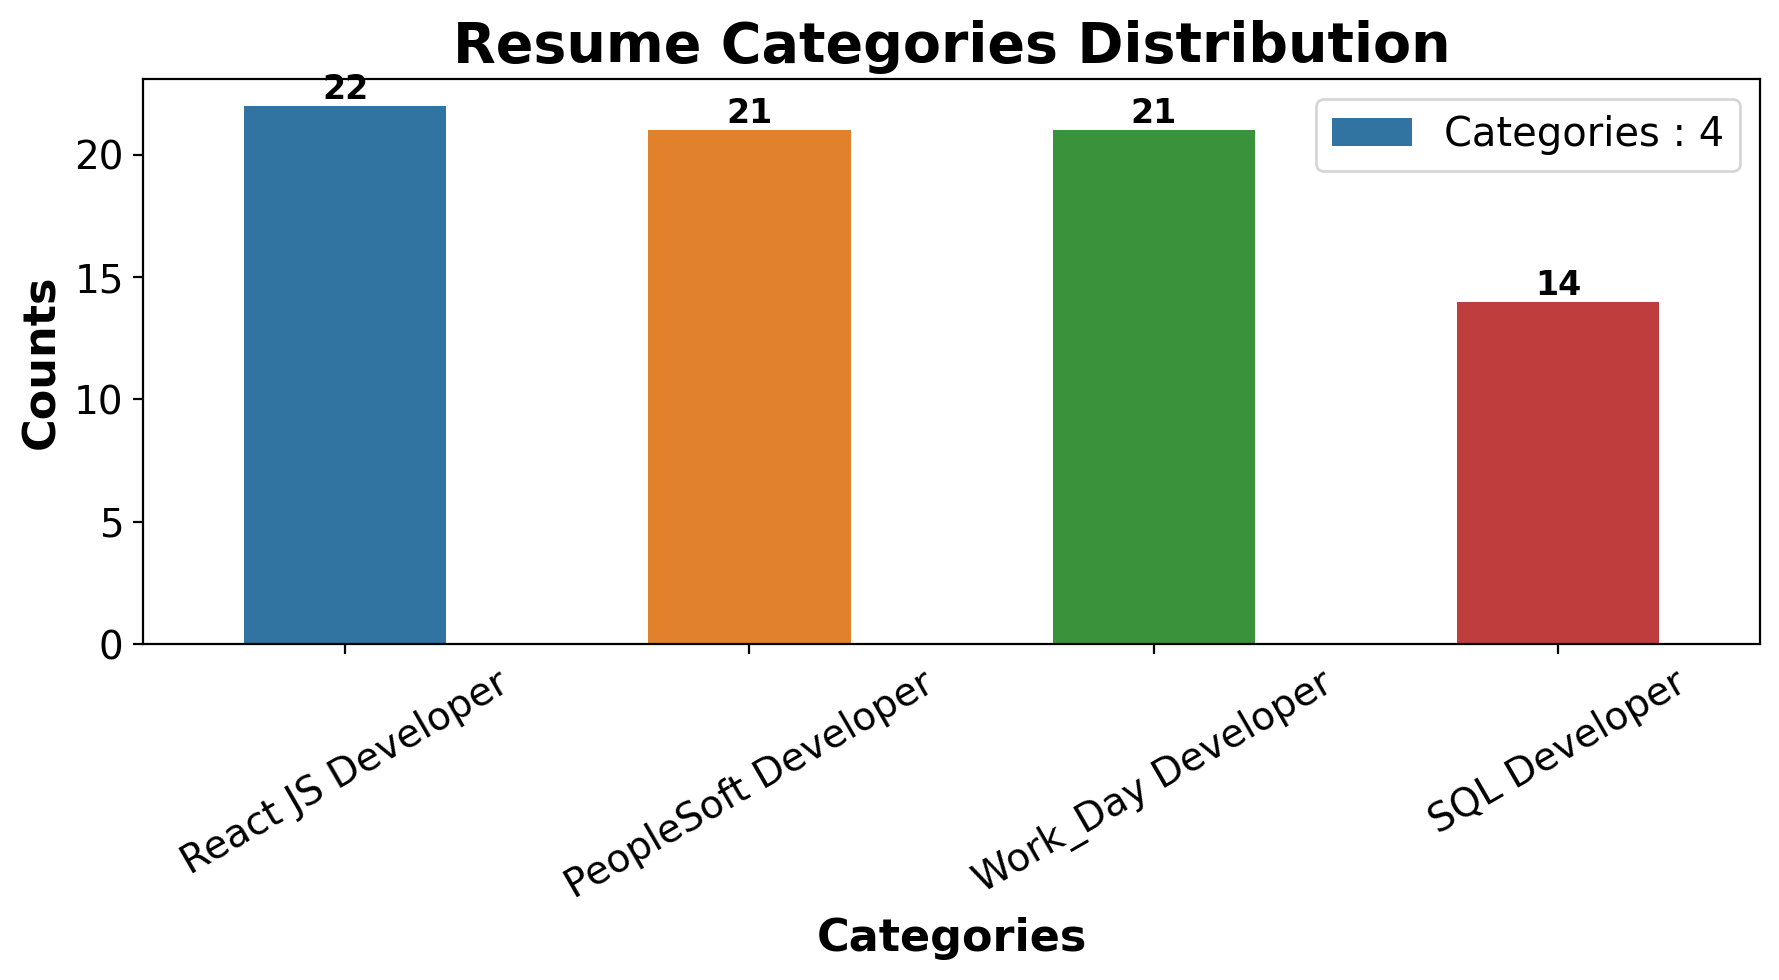

In [52]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= cleaned_data['Category'].value_counts().index, y= cleaned_data['Category'].value_counts(), width=0.5,
                 data= cleaned_data, ax= axe, label= 'Categories : {}'.format(len(cleaned_data['Category'].unique())))

axe.set_xlabel('Categories', size=16,fontweight = 'bold')
axe.set_ylabel('Counts', size=16,fontweight = 'bold')
plt.xticks(rotation = 30)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Resume Categories Distribution', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

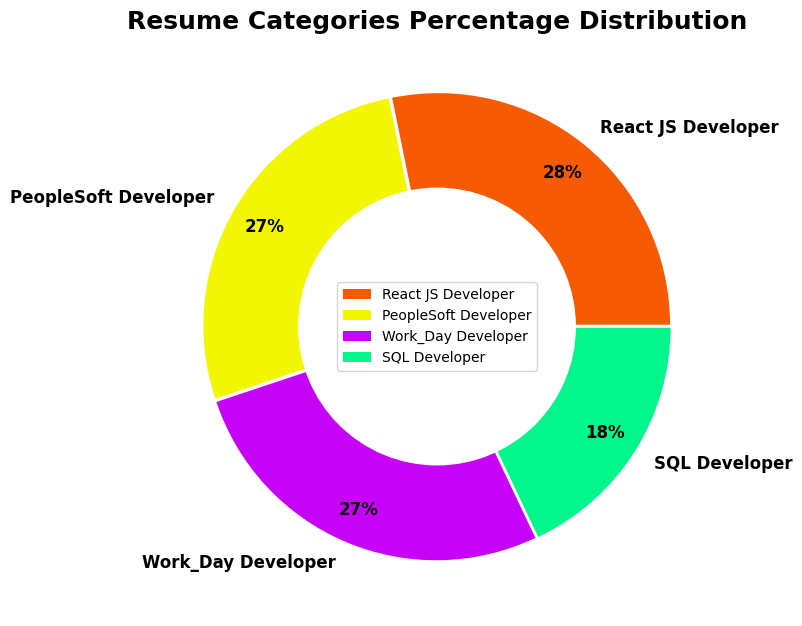

In [53]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = cleaned_data['Category'].value_counts()
labels = cleaned_data['Category'].value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Resume Categories Percentage Distribution', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()